In [1]:
%reset
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
import glob
import time
import arrow
import pickle

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# ##define areas in m2 of each cell on the boundary:boundary starts at 375

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# #print(w['e2t'][0,375:470,10])
# boundary_ys = w['e2t'][0,375:470,10]
# depths = w['gdept_1d'][:]
# #print(w['e3t_1d'][0])
# area = np.zeros([40,95])
# ydir = np.zeros([40,95])
# zdir = np.zeros([40,95])
# for i in range(0,40):
#     zdir[i,:]=w['e3t_1d'][0,i]
# for i in range(0,95):
#     ydir[:,i]=boundary_ys[i]
    
# area = ydir * zdir

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# mask_bdy = w['umask'][0,:,375:470,10]

In [4]:

start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    



### extract U velocities and transports at 10 gridcells from boundary and also sigma0 of the BCs 

In [5]:
# day1ofmonth_transports_PI9 = np.zeros([365,40,95])

# for i in range(0,365):
#     if i%20==0:
#         print(i)
#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')
#     w = f'/data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG_1d_*_dian_U_*{ymd}.nc'
#     w2 = glob.glob(w)
#     tdat = nc.Dataset(w2[0])
#     UVEL = tdat['DIC_UT']
#     UVEL_jdfmouth = UVEL[0,:,375:470,20]
#     #from mmol/s to per mol/day
#     day1ofmonth_transports_PI9[i,:,:] = UVEL_jdfmouth *(1/1000)*60*60*24
    
#     day1ofmonth_transports_PI9[day1ofmonth_transports_PI9==0] = np.nan
    
# pickle.dump(day1ofmonth_transports_PI9, open("./pkls/JDF_day1ofmonth_transports_PI9.pkl", 'wb'))


In [6]:
# day1ofmonth_transports_BR3 = np.zeros([365,40,95])

# for i in range(0,365):
#     if i%20==0:
#         print(i)
#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')
#     w = f'/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_*_dian_U_*{ymd}.nc'
#     w2 = glob.glob(w)
#     tdat = nc.Dataset(w2[0])
#     UVEL = tdat['DIC_UT']
#     UVEL_jdfmouth = UVEL[0,:,375:470,20]
#     #from mmol/s to per mol/day
#     day1ofmonth_transports_BR3[i,:,:] = UVEL_jdfmouth *(1/1000)*60*60*24
    
#     day1ofmonth_transports_BR3[day1ofmonth_transports_BR3==0] = np.nan
    
# pickle.dump(day1ofmonth_transports_BR3, open("./pkls/JDF_day1ofmonth_transports_BR3.pkl", 'wb'))


In [7]:
PI9_JDFtransports_yearly = \
    pickle.load(open('./pkls/JDF_day1ofmonth_transports_PI9.pkl', 'rb'))


PI9_JDFtransports_yearly_pos = np.copy(PI9_JDFtransports_yearly)
PI9_JDFtransports_yearly_pos[PI9_JDFtransports_yearly_pos<0] = 0
PI9_JDFtransports_yearly_neg = np.copy(PI9_JDFtransports_yearly)
PI9_JDFtransports_yearly_neg[PI9_JDFtransports_yearly_neg>0] = 0

PI9_JDFtottrans_pos = np.nansum(np.nansum(PI9_JDFtransports_yearly_pos,axis =1),axis=1)
PI9_JDFtottrans_neg = np.nansum(np.nansum(PI9_JDFtransports_yearly_neg,axis =1),axis=1)

BR3_JDFtransports_yearly = \
    pickle.load(open('./pkls/JDF_day1ofmonth_transports_BR3.pkl', 'rb'))


BR3_JDFtransports_yearly_pos = np.copy(BR3_JDFtransports_yearly)
BR3_JDFtransports_yearly_pos[BR3_JDFtransports_yearly_pos<0] = 0
BR3_JDFtransports_yearly_neg = np.copy(BR3_JDFtransports_yearly)
BR3_JDFtransports_yearly_neg[BR3_JDFtransports_yearly_neg>0] = 0

BR3_JDFtottrans_pos = np.nansum(np.nansum(BR3_JDFtransports_yearly_pos,axis =1),axis=1)
BR3_JDFtottrans_neg = np.nansum(np.nansum(BR3_JDFtransports_yearly_neg,axis =1),axis=1)

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


In [8]:
# day1ofmonth_transports_PI9 = np.zeros([365,40,120])

# for i in range(0,365):
#     if i%20==0:
#         print(i)
#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')
#     w = f'/data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG_1d_*_dian_V_*{ymd}.nc'
#     w2 = glob.glob(w)
#     print(w2)
#     tdat = nc.Dataset(w2[0])
#     VVEL = tdat['DIC_VT'][:,:,878,0:120]
#     VVEL[VVEL>1e10] = 0 
#     #UVEL_jdfmouth = UVEL[0,:,375:470,20]
#     #from mmol/s to per mol/day
#     day1ofmonth_transports_PI9[i,:,:] = VVEL *(1/1000)*60*60*24
    
#     day1ofmonth_transports_PI9[day1ofmonth_transports_PI9==0] = np.nan
    
# pickle.dump(day1ofmonth_transports_PI9, open("./pkls/JS_day1ofmonth_transports_PI9.pkl", 'wb'))

# day1ofmonth_transports_BR3 = np.zeros([365,40,120])

# for i in range(0,365):
#     if i%20==0:
#         print(i)
#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')
#     w = f'/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_*_dian_V_*{ymd}.nc'
#     w2 = glob.glob(w)
#     print(w2)
#     tdat = nc.Dataset(w2[0])
#     VVEL = tdat['DIC_VT'][:,:,878,0:120]
#     VVEL[VVEL>1e10] = 0 
#     #UVEL_jdfmouth = UVEL[0,:,375:470,20]
#     #from mmol/s to per mol/day
#     day1ofmonth_transports_BR3[i,:,:] = VVEL *(1/1000)*60*60*24
    
#     day1ofmonth_transports_BR3[day1ofmonth_transports_BR3==0] = np.nan
    
# pickle.dump(day1ofmonth_transports_BR3, open("./pkls/JS_day1ofmonth_transports_BR3.pkl", 'wb'))



In [9]:
PI9_JStransports_yearly = \
    pickle.load(open('./pkls/JS_day1ofmonth_transports_PI9.pkl', 'rb'))


PI9_JStransports_yearly_pos = np.copy(PI9_JStransports_yearly)
PI9_JStransports_yearly_pos[PI9_JStransports_yearly_pos<0] = 0
PI9_JStransports_yearly_neg = np.copy(PI9_JStransports_yearly)
PI9_JStransports_yearly_neg[PI9_JStransports_yearly_neg>0] = 0

PI9_JStottrans_neg = -1 * np.nansum(np.nansum(PI9_JStransports_yearly_pos,axis =1),axis=1)
PI9_JStottrans_pos = -1 * np.nansum(np.nansum(PI9_JStransports_yearly_neg,axis =1),axis=1)

BR3_JStransports_yearly = \
    pickle.load(open('./pkls/JS_day1ofmonth_transports_BR3.pkl', 'rb'))


BR3_JStransports_yearly_pos = np.copy(BR3_JStransports_yearly)
BR3_JStransports_yearly_pos[BR3_JStransports_yearly_pos<0] = 0
BR3_JStransports_yearly_neg = np.copy(BR3_JStransports_yearly)
BR3_JStransports_yearly_neg[BR3_JStransports_yearly_neg>0] = 0

BR3_JStottrans_neg = -1 * np.nansum(np.nansum(BR3_JStransports_yearly_pos,axis =1),axis=1)
print(np.shape(BR3_JStottrans_neg))
BR3_JStottrans_pos = -1 * np.nansum(np.nansum(BR3_JStransports_yearly_neg,axis =1),axis=1)
print(np.shape(BR3_JStottrans_pos))


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


(365,)
(365,)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


In [10]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
vdir = grid['e2t'][0,0:878,20:398]
udir = grid['e1t'][0,0:878,20:398]
wdir = grid['e3t_0'][0,:,0:878,20:398]
wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398]
wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]
wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]
surfa = vdir*udir

In [11]:
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_flx_pos = np.zeros(365)
# BR_flx_neg = np.zeros(365)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,0:878,20:398]
    
#     t_dic_tot = t_dic*surfa*60 * 60 * 24 * (1/1000) #to mols/day/cell
#     t_dic_tot[t_dic_tot>1e10] = np.nan

#     t_dic_pos = np.copy(t_dic_tot)
#     t_dic_pos[t_dic_pos<=0]=0
#     print(np.nanmax(t_dic_pos))
    
#     t_dic_neg = np.copy(t_dic_tot)
#     t_dic_neg[t_dic_neg>0] =0
#     print(np.nanmin(t_dic_neg))
#     print()
#     #print(np.shape(t_dic_tot))
#     BR_flx_pos[i] = np.nansum(t_dic_pos)
#     BR_flx_neg[i] = np.nansum(t_dic_neg)


# #BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_flx_pos, open("./pkls/BR3_flx_pos.pkl", 'wb'))
# pickle.dump(BR_flx_neg, open("./pkls/BR3_flx_neg.pkl", 'wb'))

In [12]:
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_flx_pos = np.zeros(365)
# BR_flx_neg = np.zeros(365)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,0:878,20:398]
    
#     t_dic_tot = t_dic*surfa*60 * 60 * 24 * (1/1000) #to mols/day/cell
#     t_dic_tot[t_dic_tot>1e10] = np.nan

#     t_dic_pos = np.copy(t_dic_tot)
#     t_dic_pos[t_dic_pos<=0]=0
#     print(np.nanmax(t_dic_pos))
    
#     t_dic_neg = np.copy(t_dic_tot)
#     t_dic_neg[t_dic_neg>0] =0
#     print(np.nanmin(t_dic_neg))
#     print()
#     #print(np.shape(t_dic_tot))
#     BR_flx_pos[i] = np.nansum(t_dic_pos)
#     BR_flx_neg[i] = np.nansum(t_dic_neg)


# #BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_flx_pos, open("./pkls/PI9_flx_pos.pkl", 'wb'))
# pickle.dump(BR_flx_neg, open("./pkls/PI9_flx_neg.pkl", 'wb'))

In [13]:
# print(np.nanmax(t_dic))

In [14]:
BR3_flx_pos = \
    pickle.load(open('./pkls/BR3_flx_pos.pkl', 'rb'))
BR3_flx_neg = \
    pickle.load(open('./pkls/BR3_flx_neg.pkl', 'rb'))

PI9_flx_pos = \
    pickle.load(open('./pkls/PI9_flx_pos.pkl', 'rb'))
PI9_flx_neg = \
    pickle.load(open('./pkls/PI9_flx_neg.pkl', 'rb'))



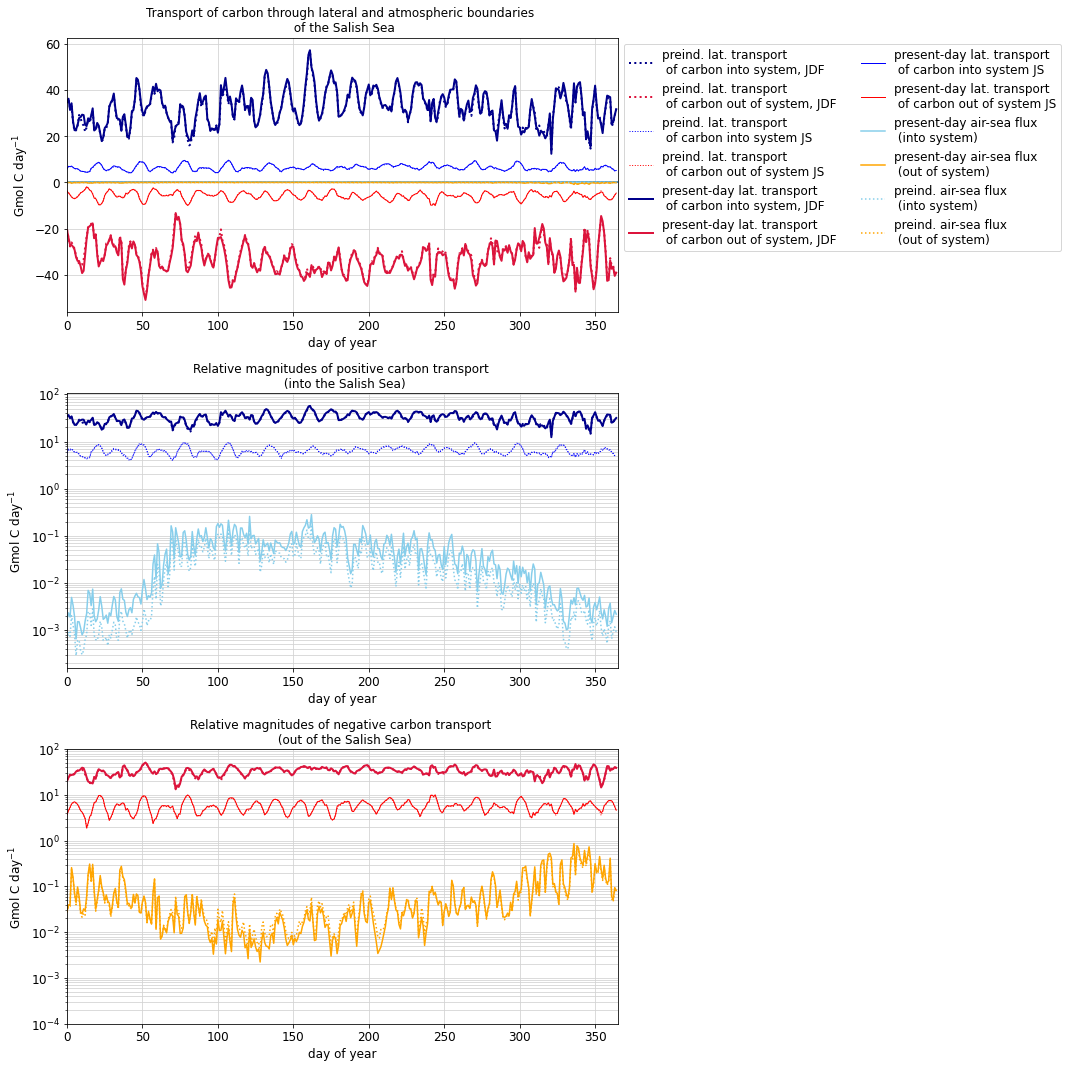

In [15]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

fact = 0.5
days = np.arange(0,365,1)
fig, axs = plt.subplots(3,1, figsize=(30*fact, 30*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(days,PI9_JDFtottrans_pos/1e9, linestyle = ':', color = 'darkblue', linewidth = 2, \
            label = 'preind. lat. transport \n of carbon into system, JDF') 
axs[0].plot(days,PI9_JDFtottrans_neg/1e9, linestyle = ':', color = 'crimson',  linewidth = 2,\
            label = 'preind. lat. transport \n of carbon out of system, JDF') 

axs[0].plot(days,PI9_JStottrans_pos/1e9, linestyle = ':', color = 'blue', linewidth = 1, \
            label = 'preind. lat. transport \n of carbon into system JS') 
axs[0].plot(days,PI9_JStottrans_neg/1e9, linestyle = ':', color = 'red', linewidth = 1, \
            label = 'preind. lat. transport \n of carbon out of system JS') 

axs[0].plot(days,BR3_JDFtottrans_pos/1e9, linestyle = '-', color = 'darkblue', linewidth = 2, \
            label = 'present-day lat. transport \n of carbon into system, JDF') 
axs[0].plot(days,BR3_JDFtottrans_neg/1e9, linestyle = '-', color = 'crimson',  linewidth = 2,\
            label = 'present-day lat. transport \n of carbon out of system, JDF') 

axs[0].plot(days,BR3_JStottrans_pos/1e9, linestyle = '-', color = 'blue', linewidth = 1, \
            label = 'present-day lat. transport \n of carbon into system JS') 
axs[0].plot(days,BR3_JStottrans_neg/1e9, linestyle = '-', color = 'red', linewidth = 1, \
            label = 'present-day lat. transport \n of carbon out of system JS') 

axs[0].axhline(y=0)
axs[0].plot(days,BR3_flx_pos/1e9, color = 'skyblue', label =  'present-day air-sea flux \n (into system)')
axs[0].plot(days,BR3_flx_neg/1e9,color = 'orange', label =  'present-day air-sea flux \n (out of system)')

axs[0].plot(days,PI9_flx_pos/1e9, color = 'skyblue', linestyle = ':', \
         label =  'preind. air-sea flux \n (into system)')
axs[0].plot(days,PI9_flx_neg/1e9,color = 'orange', linestyle = ':', \
         label =  'preind. air-sea flux \n (out of system)')


axs[0].grid(True, which="both", ls="-", color = 'lightgray')
axs[0].legend(bbox_to_anchor = [1, 1], ncol = 2)
axs[0].set_xlim([0,365])
axs[0].set_ylabel('Gmol C')
axs[0].set_xlabel('day of year')

####
axs[1].plot(days,PI9_JDFtottrans_pos/1e9, linestyle = ':', color = 'darkblue', linewidth = 2, \
            label = 'preind. lat. transport \n of carbon into system, JDF') 
axs[1].plot(days,PI9_JStottrans_pos/1e9, linestyle = ':', color = 'blue', linewidth = 1, \
            label = 'preind. lat. transport \n of carbon into system JS') 
axs[1].plot(days,BR3_JDFtottrans_pos/1e9, linestyle = '-', color = 'darkblue', linewidth = 2, \
            label = 'present-day lat. transport \n of carbon into system, JDF') 
axs[1].plot(days,BR3_JStottrans_pos/1e9, linestyle = ':', color = 'blue', linewidth = 1, \
            label = 'present-day lat. transport \n of carbon into system JS') 
axs[1].plot(days,BR3_flx_pos/1e9, color = 'skyblue', label =  'present-day air-sea flux \n (into system)')
axs[1].plot(days,PI9_flx_pos/1e9, color = 'skyblue', linestyle = ':', \
         label =  'preind. air-sea flux \n (into system)')
axs[1].axhline(y=0)
axs[1].set_xlim([0,365])
axs[1].set_ylabel('Gmol C')
axs[1].set_xlabel('day of year')
axs[1].set_yscale('log')
axs[1].grid(True, which="both", ls="-", color = 'lightgray')

####

#axs.set_yscale('log')
axs[2].plot(days,(-1)*PI9_JDFtottrans_neg/1e9, linestyle = ':', color = 'crimson', linewidth = 2, \
            label = 'preind. lat. transport \n of carbon out of system, JDF') 
axs[2].plot(days,(-1)*PI9_JStottrans_neg/1e9, linestyle = ':', color = 'red', linewidth = 1, \
            label = 'preind. lat. transport \n of carbon out of system JS') 
axs[2].plot(days,(-1)*BR3_JDFtottrans_neg/1e9, linestyle = '-', color = 'crimson', linewidth = 2, \
            label = 'present-day lat. transport \n of carbon out of system, JDF') 
axs[2].plot(days,(-1)*BR3_JStottrans_neg/1e9, linestyle = '-', color = 'red', linewidth = 1, \
            label = 'present-day lat. transport \n of carbon out of system JS') 
axs[2].plot(days,(-1)*BR3_flx_neg/1e9, color = 'orange', label =  'present-day air-sea flux \n (out of system)')
axs[2].plot(days,(-1)*PI9_flx_neg/1e9, color = 'orange', linestyle = ':', \
         label =  'preind. air-sea flux \n (out of system)')
axs[2].set_xlim([0,365])
axs[2].set_ylabel('Gmol C day$^{-1}$')
axs[2].set_xlabel('day of year')
axs[2].set_yscale('log')
axs[2].set_ylim([1e-4,1e2])
axs[2].grid(True, which="both", ls="-", color = 'lightgray')


axs[0].set_ylabel('Gmol C day$^{-1}$')
axs[1].set_ylabel('Gmol C day$^{-1}$')
axs[2].set_ylabel('Gmol C day$^{-1}$')


axs[0].set_title('Transport of carbon through lateral and atmospheric boundaries \n of the Salish Sea', fontsize = 12)
axs[1].set_title('Relative magnitudes of positive carbon transport \n (into the Salish Sea)', fontsize = 12)
axs[2].set_title('Relative magnitudes of negative carbon transport \n (out of the Salish Sea)', fontsize = 12)

plt.tight_layout()
#plt.suptitle('Mean transport of carbon through the SalishSeaCast boundaries by yearday', fontsize = 18)

In [16]:
BR3_totneg_JDF = (np.sum(BR3_JDFtottrans_neg/1e9))
BR3_totpos_JDF = (np.sum(BR3_JDFtottrans_pos/1e9))
BR3_totneg_JS = (np.sum(BR3_JStottrans_neg/1e9))
BR3_totpos_JS = (np.sum(BR3_JStottrans_pos/1e9))
BR3_totneg_airsea = (np.sum(BR3_flx_neg/1e9)) 
BR3_totpos_airsea = (np.sum(BR3_flx_pos/1e9)) 

PI9_totneg_JDF = (np.sum(PI9_JDFtottrans_neg/1e9))
PI9_totpos_JDF = (np.sum(PI9_JDFtottrans_pos/1e9))
PI9_totneg_JS = (np.sum(PI9_JStottrans_neg/1e9))
PI9_totpos_JS = (np.sum(PI9_JStottrans_pos/1e9))
PI9_totneg_airsea = (np.sum(PI9_flx_neg/1e9)) 
PI9_totpos_airsea = (np.sum(PI9_flx_pos/1e9)) 

In [17]:
print('positive always INTO system')
print('')
print('BR3: total lateral pos transport, GMol/year')
print(np.sum(BR3_totpos_JDF+BR3_totpos_JS))
print('BR3: total lateral neg transport, GMol/year')
print(np.sum(BR3_totneg_JDF+BR3_totneg_JS))
print('BR3: total positive air-sea flux, GMol/year')
print(np.sum(BR3_totpos_airsea))
print('BR3: total negative air-sea flux, GMol/year')
print(np.sum(BR3_totneg_airsea))
print('')
print('PI9: total lateral pos transport, GMol/year')
print(np.sum(PI9_totpos_JDF+PI9_totpos_JS))
print('PI9: total lateral neg transport, GMol/year')
print(np.sum(PI9_totneg_JDF+PI9_totneg_JS))
print('PI9: total positive air-sea flux, GMol/year')
print(np.sum(PI9_totpos_airsea))
print('PI9: total negative air-sea flux, GMol/year')
print(np.sum(PI9_totneg_airsea))



positive always INTO system

BR3: total lateral pos transport, GMol/year
14205.796179903891
BR3: total lateral neg transport, GMol/year
-14183.491470254525
BR3: total positive air-sea flux, GMol/year
17.85486504976131
BR3: total negative air-sea flux, GMol/year
-28.1560719375228

PI9: total lateral pos transport, GMol/year
13987.768191336887
PI9: total lateral neg transport, GMol/year
-13957.13636490385
PI9: total positive air-sea flux, GMol/year
9.865655941971916
PI9: total negative air-sea flux, GMol/year
-26.337241198514526


In [18]:
print('positive always INTO system')
print('')
print('BR3: net lateral JDF transport, GMol/year')
print(np.sum(BR3_totpos_JDF+BR3_totneg_JDF))
print('BR3: net lateral JS transport, GMol/year')
print(np.sum(BR3_totpos_JS+BR3_totneg_JS))
print('BR3: net lateral transport, GMol/year')
print(np.sum(BR3_totpos_JDF+BR3_totneg_JDF+BR3_totpos_JS+BR3_totneg_JS))
print('BR3: net airseaflux, GMol/year')
print(np.sum(BR3_totneg_airsea+BR3_totpos_airsea))
print('BR3: net fluxes, GMol/year')
print(np.sum(BR3_totpos_JDF+BR3_totneg_JDF+BR3_totpos_JS+BR3_totneg_JS+\
            BR3_totneg_airsea+BR3_totpos_airsea))
print('')
print('PI9: net lateral JDF transport, GMol/year')
print(np.sum(PI9_totpos_JDF+PI9_totneg_JDF))
print('PI9: net lateral JS transport, GMol/year')
print(np.sum(PI9_totpos_JS+PI9_totneg_JS))
print('PI9: net lateral transport, GMol/year')
print(np.sum(PI9_totpos_JDF+PI9_totneg_JDF+PI9_totpos_JS+PI9_totneg_JS))
print('PI9: net airseaflux, GMol/year')
print(np.sum(PI9_totneg_airsea+PI9_totpos_airsea))
print('PI9: net fluxes, GMol/year')
print(np.sum(PI9_totpos_JDF+PI9_totneg_JDF+PI9_totpos_JS+PI9_totneg_JS+\
            PI9_totneg_airsea+PI9_totpos_airsea))
print('')


positive always INTO system

BR3: net lateral JDF transport, GMol/year
-224.40619414867615
BR3: net lateral JS transport, GMol/year
246.71090379804218
BR3: net lateral transport, GMol/year
22.304709649366032
BR3: net airseaflux, GMol/year
-10.301206887761488
BR3: net fluxes, GMol/year
12.003502761604544

PI9: net lateral JDF transport, GMol/year
-208.79923629725272
PI9: net lateral JS transport, GMol/year
239.43106273028843
PI9: net lateral transport, GMol/year
30.631826433035712
PI9: net airseaflux, GMol/year
-16.47158525654261
PI9: net fluxes, GMol/year
14.160241176493102



# JS

In [19]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bcind = 887
mask_bdy = w['vmask'][0,:,bcind,41:71]
print(np.shape(mask_bdy))


w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#print(w['e2t'][0,375:470,10])

boundary_xs = w['e1t'][0,bcind,41:71]
depths = w['gdept_1d'][:]
#print(w['e3t_1d'][0])
area = np.zeros([40,30])
xdir = np.zeros([40,30])
zdir = np.zeros([40,30])
for i in range(0,40):
    zdir[i,:]=w['e3t_1d'][0,i]
for i in range(0,30):
    xdir[:,i]=boundary_xs[i]
    
area = xdir * zdir

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# mask_bdy = w['umask'][0,:,375:470,10]

days = ['0101','0201','0301','0401','0501','0601','0701','0801','0901','1001','1101','1201']
#w1 = nc.Dataset(f'/data/tjarniko/results/BASERUN_EXP/PI5/ncs/{tf}')
day1ofmonth_velocities_PI5 = np.zeros([365,40,30])
day1ofmonth_transports_PI5 = np.zeros([365,40,30])
### get 

UVEL_JS = np.zeros([365,40,30])
s = time.time()
for i in range(0,365):
    if i%10 == 0:
        print(i)
    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    
    w = f'/data/tjarniko/results/BASERUN_EXP/PI5/ncs/SKOG_1d_*_dian_V_2015*{ymd}.nc'
    w2 = glob.glob(w)
    tdat = nc.Dataset(w2[0])
    #print(tdat)
    VVEL = tdat['DIC_VT'][0,:,bcind,41:71]
    day1ofmonth_velocities_PI5[i,:,:] = VVEL
    day1ofmonth_transports_PI5[i,:,:] = VVEL *(1/1000)*60*60*24

(40, 30)
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


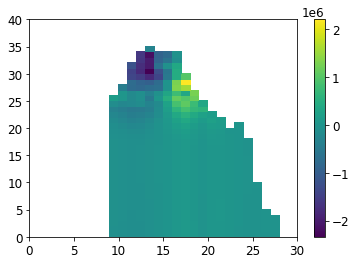

In [20]:
ttest = day1ofmonth_velocities_PI5[0,:,:]
ttest[ttest == 0] = np.nan
plt.pcolormesh(ttest)
plt.colorbar()

In [21]:
np.shape(day1ofmonth_transports_PI5)

pos_JS_transport = np.copy(day1ofmonth_transports_PI5)
pos_JS_transport[pos_JS_transport<0] = 0
neg_JS_transport = np.copy(day1ofmonth_transports_PI5)
neg_JS_transport[neg_JS_transport>0] = 0

pos_JS_sum = np.zeros([365])
neg_JS_sum = np.zeros([365])

for i in range(0,365):
    pos_JS_sum[i] = np.nansum(pos_JS_transport[i,:,:])
    neg_JS_sum[i] = np.nansum(neg_JS_transport[i,:,:])
    
JS_sum_inward = -1 * neg_JS_sum
JS_sum_outward = -1*pos_JS_sum

Text(0.5, 0.98, 'Mean transport of water through the Johnstone Strait boundary by yearday')

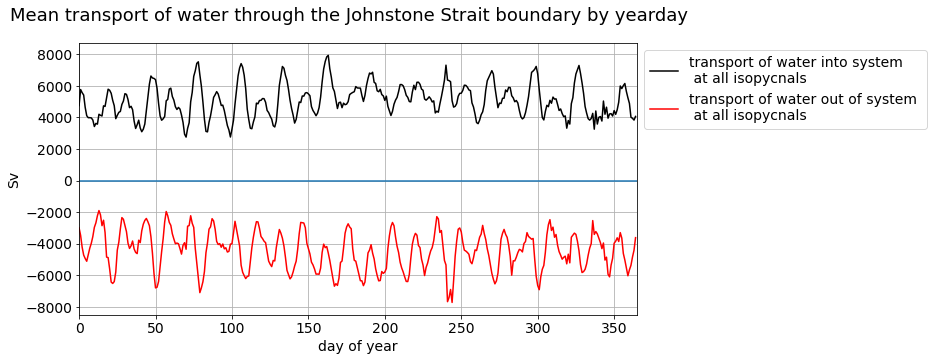

In [22]:
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}

fact = 0.5
days = np.arange(0,365,1)
fig, axs = plt.subplots(1,1, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')


axs.plot(days,JS_sum_inward/1e6, 'k-', \
            label = 'transport of water into system \n at all isopycnals') 
# axs.plot(days,pos_trans_lessthan_sig25/1e6, 'k:', \
#             label = 'transport of water into system \n at isopycnals $\sigma$$\\theta$ < 25') 
# axs.plot(days,neg_trans_lessthan_sig25/1e6, 'r:',\
#            label = 'transport of water out of system \n at isopycnals $\sigma$$\\theta$ < 25') 
axs.plot(days,JS_sum_outward/1e6, 'r-',\
           label = 'transport of water out of system \n at all isopycnals')
axs.axhline(y=0)
axs.grid()
axs.legend(bbox_to_anchor = [1, 1])
axs.set_xlim([0,365])
axs.set_ylabel('Sv')
axs.set_xlabel('day of year')
plt.suptitle('Mean transport of water through the Johnstone Strait boundary by yearday', fontsize = 18)

NameError: name 'tot_pos_trans' is not defined

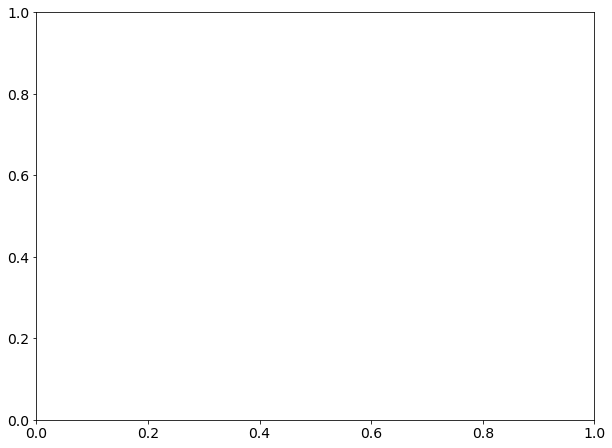

In [23]:
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}

fact = 0.5
days = np.arange(0,365,1)
fig, axs = plt.subplots(1,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')


axs.plot(days,tot_pos_trans/1e6, 'k-', linewidth = 2, \
            label = 'transport of water into system \n at all isopycnals \n (Juan de Fuca Strait)') 
axs.plot(days,pos_trans_lessthan_sig25/1e6, 'k:', \
            label = 'transport of water into system \n at isopycnals $\sigma$$\\theta$ < 25 \n (Juan de Fuca Strait)') 
axs.plot(days,JS_sum_inward/1e6, color = 'grey', linestyle = '-', \
            label = 'transport of water into system \n at all isopycnals \n (Johnstone Strait)') 

axs.plot(days,JS_sum_outward/1e6, color = 'red', linestyle = '-', \
            label = 'transport of water out of system \n at all isopycnals \n (Johnstone Strait)') 

axs.plot(days,neg_trans_lessthan_sig25/1e6, color = 'firebrick', linestyle = ':',\
           label = 'transport of water out of system \n at isopycnals $\sigma$$\\theta$ < 25, \n (Juan de Fuca Strait)') 
axs.plot(days,tot_neg_trans/1e6, color = 'firebrick', linewidth = 2, \
           label = 'transport of water out of system \n at all isopycnalsm \n (Juan de Fuca Strait)')
axs.axhline(y=0)
axs.grid()
axs.legend(bbox_to_anchor = [1, 1])
axs.set_xlim([0,365])
axs.set_ylabel('Sv')
axs.set_xlabel('day of year')
plt.suptitle('Mean transport of water through the SalishSeaCast boundaries by yearday', fontsize = 18)

In [ ]:
np.sum(neg_JS_sum)/np.sum(tot_pos_trans)

In [ ]:
print(f'mean pos (inward) transport, JDF, Sv: {np.nanmean(tot_pos_trans)/1e6}')
print(f'mean neg (outward) transport, JDF, : {np.nanmean(tot_neg_trans)/1e6}')
print(f'mean pos transport, JS, Sv: {np.nanmean(JS_sum_inward)/1e6}')
print(f'mean neg transport, JS, : {np.nanmean(JS_sum_outward)/1e6}')


print()
print(f'mean pos transport, JDF+JS, Sv: {np.nanmean(tot_pos_trans+JS_sum_inward)/1e6}')
print(f'mean neg transport, JDF+JS, : {np.nanmean(tot_neg_trans+JS_sum_outward)/1e6}')
# print((np.nanmean(tot_pos_trans)+np.nanmean(tot_neg_trans)+\
#       np.nanmean(pos_JS_sum)+np.nanmean(neg_JS_sum))/1e6)
print(f'total mean transp (out): {np.sum(tot_pos_trans+tot_neg_trans+JS_sum_inward+JS_sum_outward)/1e6/365}')

print()
print(f'total mean transport in via rivers (Sv) {(3684.9115288597663+3548.8770919476597)/1e6})')

print(f'diff between transp in and out: {0.007233788620807426-0.00397947957495884}' )
print(f'the above diff as % of mean neg transp: {(0.0032543090458485857/0.2057853845137228)*100}')

print()
print('breakdown of transport in (rivers)')
print('Fraser mean flow vol. (yr 2015) calc. at: RIVER_PAPER/not_checked/Fraser_flowvolume.ipynb')
print(f'3684.9115288597663 m3/s or {3684.9115288597663/1e6} Sv')
print(f'non-fraser flow vol calc at RIVER_PAPER/maps_rivers_modeldisc.ipynb')
print(f'3548.877 m3/s or {3548.8770919476597/1e6} Sv')
